In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1:] == (28,28))
assert(X_test.shape[1:] == (28,28))

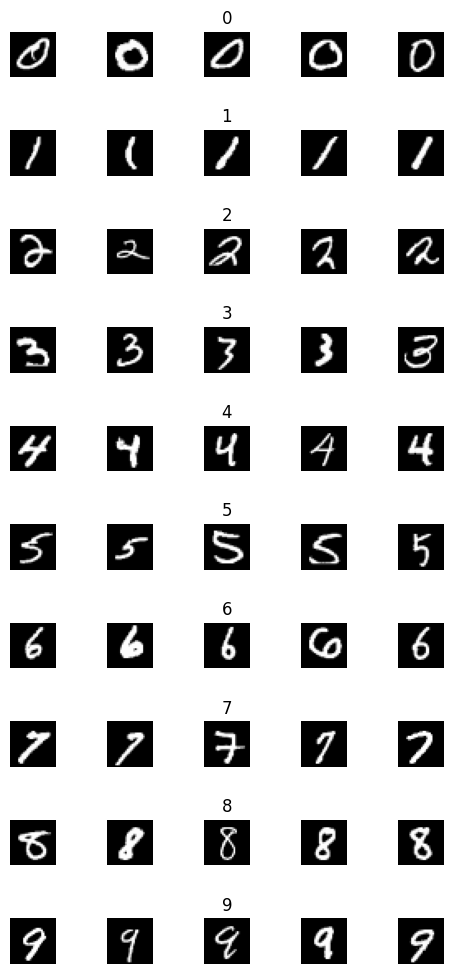

In [ ]:
num_of_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

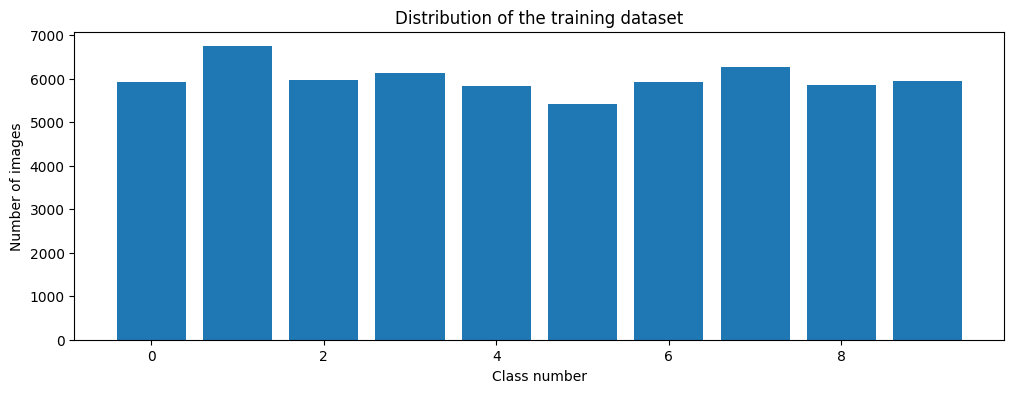

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8600 (33.59 KB)
Trainable params: 8600 (33.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 3s 4ms/step - loss: 1.1241 - accuracy: 0.6367 - val_loss: 0.3973 - val_accuracy: 0.8983
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8864 - val_loss: 0.2950 - val_accuracy: 0.9177
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.9068 - val_loss: 0.2568 - val_accuracy: 0.9248
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9156 - val_loss: 0.2434 - val_accuracy: 0.9295
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.9211 - val_loss: 0.2253 - val_accuracy: 0.9353
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.9264 - val_loss: 0.2168 - val_accuracy: 0.9368
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2467 - accuracy: 0.9299 - val_loss: 0.2004 - val_accuracy: 0.9432
Epoch 

Text(0.5, 0, 'epoch')

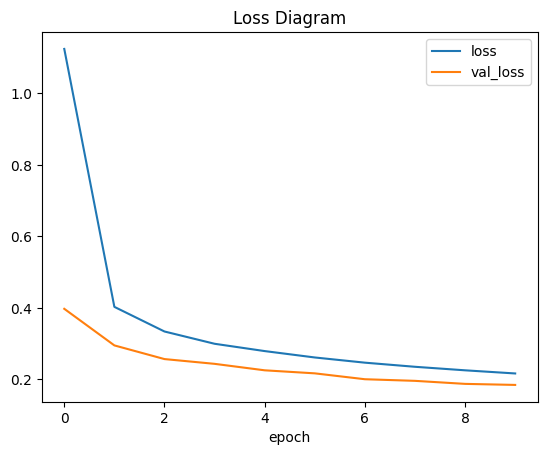

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss Diagram')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

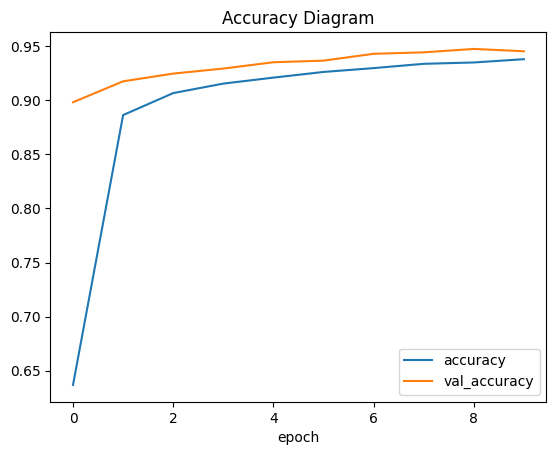

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Diagram')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Rest Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Rest Score: 0.22169069945812225
Test Accuracy: 0.9387000203132629


************************************************************************** **Extension

```

```

**

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

In [ ]:
def build_vgg(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
vgg_model = build_vgg()
print(vgg_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [ ]:
history_vgg = vgg_model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
422/422 [==============================] - 185s 437ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 2/10
422/422 [==============================] - 184s 436ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0460 - val_accuracy: 0.9880
Epoch 3/10
422/422 [==============================] - 197s 466ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0297 - val_accuracy: 0.9917
Epoch 4/10
422/422 [==============================] - 183s 435ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 5/10
422/422 [==============================] - 183s 434ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0350 - val_accuracy: 0.9913
Epoch 6/10
422/422 [==============================] - 183s 432ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0415 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 191s 452ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0309 -

In [ ]:
score_vgg = vgg_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score_vgg[0])
print('Test Accuracy:', score_vgg[1])

Test Loss: 0.028976984322071075
Test Accuracy: 0.9922999739646912


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting accuracy and loss for VGG model
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

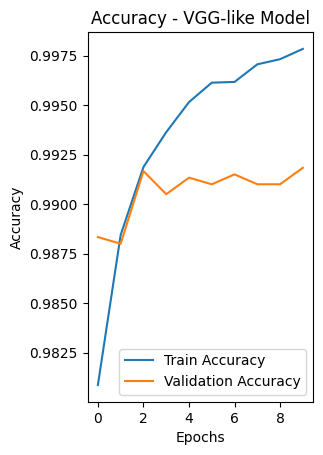

In [ ]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy - VGG-like Model')
plt.legend()

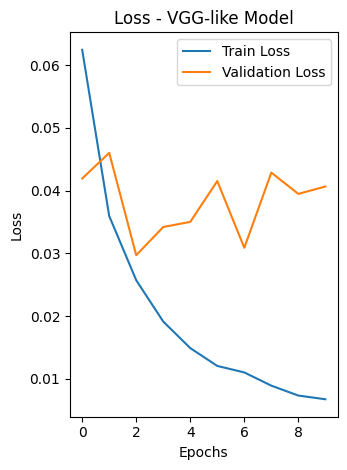

In [ ]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss - VGG-like Model')
plt.legend()

plt.tight_layout()
plt.show()